# Loading/saving data with Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Text data (CSV files)

The `numpy` library comes with support for loading data stored as text files, in particular tables stored in the CSV ("comma-separated values") format. CSV is a a standard format for tabular data that is compatible with basically every software that works with tables (Excel, etc.). It only stores the raw data, no formatting, formulas, etc. 

There are two functions two load such files with `numpy`: [`numpy.loadtxt`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html) and [`numpy.genfromtxt`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html). The latter is more powerful and can for example handle missing values. 

In [2]:
# Let's try to load a file with last week's weather data
data = np.genfromtxt('data/Okinawa_weather_data.csv')

ValueError: Some errors were detected !
    Line #6 (got 13 columns instead of 1)
    Line #7 (got 5 columns instead of 1)
    Line #12 (got 22 columns instead of 1)

That didn't work... Unfortunately that happens quite often. While CSV stands for "comma-separated values", actual CSV files separate values often by other characters such as space or semicolon. In addition, the first rows of a CSV file often contain comments and other data that is not organized into the same columns as the main data of a file. When opening such files, it is common to simply ignore these lines.

In [3]:
# Load the file specifying the character that separates values, and skipping the first 12 rows
data = np.genfromtxt('data/Okinawa_weather_data.csv', delimiter=';', skip_header=12)

Now, we have a resonably looking 2-dimensional matrix of values: 

In [4]:
data

array([[2018.  ,    6.  ,   20.  , ...,    0.  ,   27.34,  189.09],
       [2018.  ,    6.  ,   20.  , ...,    0.  ,   28.05,  188.86],
       [2018.  ,    6.  ,   20.  , ...,    0.  ,   28.31,  191.74],
       ...,
       [2018.  ,    6.  ,   27.  , ...,    0.  ,   10.31,  155.22],
       [2018.  ,    6.  ,   27.  , ...,    0.  ,   10.81,  150.02],
       [2018.  ,    6.  ,   27.  , ...,    0.  ,   11.12,  150.95]])

In [5]:
# Check the dimensions of the matrix
data.shape

(192, 10)

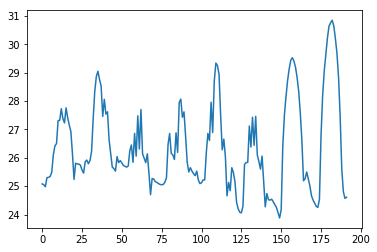

In [6]:
plt.plot(data[:, 5])  # Plot all the temperature values

Text(0,0.5,'rel. humidity')

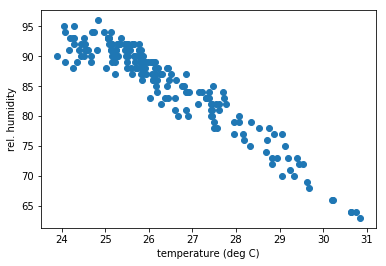

In [7]:
plt.scatter(data[:, 5], data[:, 6])  # Plot humidity against temperature
plt.xlabel('temperature (deg C)')
plt.ylabel('rel. humidity')

The disadvantage of the above method is that one has to use column indices -- it is easy to use the wrong column by accident (remember: indices start at 0). The column names are defined in the row above the actual data. We previously skipped this line, by including it and calling `genfromtxt` with `names=True` it will be read in the column names. Note that some of the column names include spaces, these will be replaced by underscores by default:

In [8]:
data_with_names = np.genfromtxt('data/Okinawa_weather_data.csv', skip_header=11, delimiter=';', names=True,)

In contrast to before, the data is now no longer a two-dimensional array. Instead, it is now echnically a one-dimensional array of rows, where each row has a [structured datatype](https://docs.scipy.org/doc/numpy/user/basics.rec.html).

In [9]:
print('Shape: ', data_with_names.shape)
print('data type:', data_with_names.dtype)

Shape:  (192,)
data type: [('Year', '<f8'), ('Month', '<f8'), ('Day', '<f8'), ('Hour', '<f8'), ('Minute', '<f8'), ('Temperature__2_m_above_gnd', '<f8'), ('Relative_Humidity__2_m_above_gnd', '<f8'), ('Total_Precipitation__sfc', '<f8'), ('Wind_Speed__10_m_above_gnd', '<f8'), ('Wind_Direction__10_m_above_gnd', '<f8')]


The data type definition looks very complicated, but it allows us to access columns by name instead of by index:

In [10]:
# all values from a column
temperatures = data_with_names['Temperature__2_m_above_gnd']
print('Min temperature: ', np.min(temperatures), ', max temperature: ', np.max(temperatures))
# A value of a row:
print('First day of recording:', data_with_names[0]['Day'])

Min temperature:  23.88 , max temperature:  30.85
First day of recording: 20.0


If you are regularly working with tabular files like this, you should have a look at the [`pandas` library](http://pandas.pydata.org/), a powerful library built exactly for thisirtual use case. It is not pre-installed in the virtual machine, but you can install it via the conda package manager in a terminal (`conda install pandas`). If this notebook was already open, you have to restart the kernel (in the menu "Kernel -> Restart", or with the "Reload button" in the toolbar) to make use of the newly installed package.

In [11]:
import pandas as pd

With `pandas`, you read CSV data into a so called "data frame". It will automatically use the first row (after the skipped rows) as the header that defines the column names. It displays nicely in a jupyter notebook

In [12]:
pd_data = pd.read_csv('data/Okinawa_weather_data.csv', skiprows=11, sep=';')
pd_data

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Relative Humidity [2 m above gnd],Total Precipitation [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd]
0,2018,6,20,0,0,25.08,93.0,0.0,27.34,189.09
1,2018,6,20,1,0,25.05,93.0,0.0,28.05,188.86
2,2018,6,20,2,0,24.98,94.0,0.0,28.31,191.74
3,2018,6,20,3,0,25.30,92.0,0.0,28.74,192.30
4,2018,6,20,4,0,25.31,92.0,0.0,29.25,193.52
5,2018,6,20,5,0,25.34,92.0,0.0,29.43,194.89
6,2018,6,20,6,0,25.49,92.0,0.0,28.48,196.14
7,2018,6,20,7,0,26.10,89.0,0.0,28.69,197.53
8,2018,6,20,8,0,26.42,88.0,0.0,28.59,196.84
9,2018,6,20,9,0,26.50,87.0,0.0,28.93,196.63


We don't have time to go into details, but a data frame can be used to analyse data in very convenient ways. For example, to group the data by days and look at the mean and the standard deviation of all columns over a day, run the following:

In [13]:
pd_data.groupby('Day').aggregate(['mean', 'std'])

Year      Month       Hour           Minute       \
     mean  std  mean  std  mean       std   mean  std   
Day                                                     
20   2018  0.0     6  0.0  11.5  7.071068      0  0.0   
21   2018  0.0     6  0.0  11.5  7.071068      0  0.0   
22   2018  0.0     6  0.0  11.5  7.071068      0  0.0   
23   2018  0.0     6  0.0  11.5  7.071068      0  0.0   
24   2018  0.0     6  0.0  11.5  7.071068      0  0.0   
25   2018  0.0     6  0.0  11.5  7.071068      0  0.0   
26   2018  0.0     6  0.0  11.5  7.071068      0  0.0   
27   2018  0.0     6  0.0  11.5  7.071068      0  0.0   

    Temperature  [2 m above gnd]           Relative Humidity  [2 m above gnd]  \
                            mean       std                               mean   
Day                                                                             
20                     26.273333  0.955477                          88.041667   
21                     26.820833  1.245496                          85.500000   
22                     25.968750  0.674532                          88.625000   
23                     26.093333  0.963791                          87.416667   
24                     26.426250  1.472495                          84.125000   
25                     25.449167  1.054394                          88.791667   
26                     26.654167  2.086607                          82.500000   
27                     27.259167  2.634290                          79.250000   

               Total Precipitation  [sfc]            \
           std                       mean       std   
Day                                                   
20    4.206405                   0.000000  0.000000   
21    5.307910                   0.004167  0.020412   
22    2.102018                   0.120833  0.150302   
23    4.538882                   0.033333  0.109014   
24    7.753330                   0.020833  0.050898   
25    4.615467                   0.245833  0.515819   
26    7.610062                   0.000000  0.000000   
27   11.685182                   0.000000  0.000000   

    Wind Speed  [10 m above gnd]           Wind Direction  [10 m above gnd]  \
                            mean       std                             mean   
Day                                                                           
20                     28.416250  1.369947                       197.254583   
21                     26.200000  3.332233                       203.258333   
22                     22.254583  2.752818                       201.330000   
23                     23.897500  1.995339                       207.780000   
24                     16.564583  4.199819                       211.315417   
25                     10.814583  3.190542                       160.555417   
26                     14.204167  2.301563                       133.055000   
27                     12.681250  2.653125                       172.860417   

                
           std  
Day             
20    4.229181  
21    3.686707  
22    4.184341  
23    5.259640  
24   15.536697  
25   36.243786  
26   11.139748  
27   12.355106

## Matlab files

The `scipy` library comes with support to load matlab files in its `io` package:

In [14]:
import scipy.io as sio

In [15]:
mat_data = sio.loadmat('data/matlab_old.mat')

The data is loaded as a Python dictionary, with the variable names as the keys and the variable values as the, well, values:

In [16]:
mat_data['X']

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100]], dtype=uint8)

Note that Matlab does not have the concept of one-dimensional arrays, vectors are either row- or column-vectors and therefore two-dimensional (with one of the dimensions having size one):

In [17]:
mat_data['X'].shape

(1, 100)

If you want to avoid this, you can automatically "squeeze" the dimensions when loading:

In [18]:
mat_data = sio.loadmat('data/matlab_old.mat', squeeze_me=True)
mat_data['X'].shape

(100,)

You can also access cell arrays or structures:

In [19]:
print('cell array:', mat_data['c'])
print('name elements of structure s:', mat_data['s']['name'])

cell array: ['ABC' 123 -432.3]
name elements of structure s: ['John Doe' 'Ann Lane']


Note that Matlab files stored in the `v7.3` format cannot be loaded with scipy:

In [20]:
mat_data = sio.loadmat('data/matlab_new.mat', squeeze_me=True)

NotImplementedError: Please use HDF reader for matlab v7.3 files

However, such files are [HDF5 files](https://en.wikipedia.org/wiki/Hierarchical_Data_Format) and can therefore be loaded with standard tools. In Python, [`h5py`](https://www.h5py.org/) and [`pytables`](https://www.pytables.org/) libraries are the most widely used to access datas in this format. They are not installed on the virtual machine, but also available via conda (`conda install h5py`, respectively `conda install pytables`).

For simple array data, the usage is quite similar to scipy's `loadmat` function:

In [21]:
import h5py

data = h5py.File('data/matlab_new.mat')
data['X'].value[:10]  # Only show the first 10 values

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

For more complex data structures however getting to the data is more complicated...

## Saving data

To save data in the matlab format, you can use scipy's `savemat` function:

In [22]:
x = np.arange(10)  # some data
y = np.random.rand(10) # some more random data
# The variables to save have to be given as a dictionary of variable names and values:
sio.savemat('file.mat', {'x': x})

Numpy also comes with several functions to save data:

In [23]:
np.savetxt('file.txt', x)  # Save a single variable (1d or 2d) in a text format (could be a CSV file)

In [24]:
np.save('file.npy', x)  # save a single variable (arbitrary number of dimensions) to a numpy-only format

In [25]:
np.savez('file.npy', x=x, y=y)  # Save several files (again: numpy-only format)

In [26]:
np.savez_compressed('file.npy', x=x, y=y)  # Same as above, but additionaly compress the file to